# TensorFlow Serving
* Es una libreria que nos permite subirlo a la nube
* Se puede hacer un control de version

Comparado con Flask:
  * Tiene escalabilidad 
  * Baja latencia
  * Puede usar multiples modelos
  * Puede usar varios modelos al mismo tiempo



## Paso 1: Instalacion de dependecias y de GPU

intalar todas los paquetes:

In [0]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -
#!pip install tensorflow-gpu==1.13.1 
# el codigo esta preparado para tensorflow serving .

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  15737      0 --:--:-- --:--:-- --:--:-- 15654
OK


In [0]:
!apt-get update & apt-get install tensorflow-model-server

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:6 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 P

In [1]:
import os
import json
import random
import requests
import subprocess
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.2.0-rc4'

## Paso 2: Preprocesado de datos

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [0]:
X_test = X_test / 255
X_train = X_train / 255

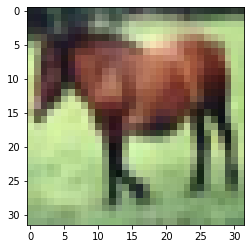

In [15]:
plt.imshow(X_train[7])

In [16]:
X_train.shape

(50000, 32, 32, 3)

## Paso 3: Definir modelo

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Compilar Modelo:

In [0]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

## Entrenar Modelo

In [0]:
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 232s 593ms/step - loss: 1.4817 - sparse_categorical_accuracy: 0.4667
Epoch 2/10
391/391 [==============================] - 231s 592ms/step - loss: 1.0124 - sparse_categorical_accuracy: 0.6449
Epoch 3/10
391/391 [==============================] - 232s 593ms/step - loss: 0.8222 - sparse_categorical_accuracy: 0.7135
Epoch 4/10
391/391 [==============================] - 232s 593ms/step - loss: 0.6973 - sparse_categorical_accuracy: 0.7580
Epoch 5/10
391/391 [==============================] - 231s 591ms/step - loss: 0.6010 - sparse_categorical_accuracy: 0.7907
Epoch 6/10
391/391 [==============================] - 231s 590ms/step - loss: 0.5155 - sparse_categorical_accuracy: 0.8200
Epoch 7/10
391/391 [==============================] - 231s 591ms/step - loss: 0.4350 - sparse_categorical_accuracy: 0.8492
Epoch 8/10
391/391 [==============================] - 231s 592ms/step - loss: 0.3539 - sparse_categorical_accuracy: 0.8769
Epoch 9/10
391/3

## Paso 4 : Evaluar

In [9]:
#model = tf.keras.models.load_model('cifar10.h5')
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 13s 41ms/step - loss: 0.9854 - sparse_categorical_accuracy: 0.7534


In [10]:
print("La precisión del modelo es de {} %".format(test_accuracy*100.0))

La precisión del modelo es de 75.34000277519226 %


## Paso 5 : Guardar Modelo para subir a Produccion

In [0]:
MODEL_DIR = 'model/'
version = 1

In [21]:
export_path = os.path.join(MODEL_DIR,str(version))
export_path

'model/1'

In [0]:
if os.path.isdir(export_path):
  !rm -r (export_path)

In [0]:
#model.save('cifar10.h5')

## Guardar el modelo para tensorflow serving

In [17]:
#se guarda para una version vieja de tensorflow
#tf.saved_model.simple_save(tf.keras.backend.get_session(), export_dir=export_path, inputs={"input_image":model.input}, outputs={t.name:t for t in model.outputs})

AttributeError: ignored

## Paso 6: Configurar el entorno de producción

### Exportar el MODEL_DIR a las variables de entorno

In [0]:
os.environ['MODEL_DIR'] = os.path.abspath(MODEL_DIR)

### Ejecutar la API REST de TensorFlow Serving

In [24]:
#cargar el modelo en segundo plano
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8000 --model_name=cifar10 --model_base_path="${MODEL_DIR}" > server.log 2>&1

Starting job # 2 in a separate thread.


In [25]:
!tail server.log

nohup: failed to run command 'tensorflow_model_server': No such file or directory


## Paso 7: Crear nuestra primera petición por POST

In [26]:
random_image = np.random.randint(0, len(X_test))
random_image

4867

### Crear el objeto de datos en JSON

In [0]:
data = json.dumps({"signature_name":"serving_default", "instances":[X_test[random_image].tolist()]})
#si o si se tiene que enviar por medio de lista

In [28]:
data

'{"signature_name": "serving_default", "instances": [[[[0.12549019607843137, 0.09803921568627451, 0.2235294117647059], [0.10588235294117647, 0.07450980392156863, 0.2235294117647059], [0.10196078431372549, 0.07450980392156863, 0.21568627450980393], [0.11372549019607843, 0.08627450980392157, 0.2196078431372549], [0.12941176470588237, 0.10196078431372549, 0.24313725490196078], [0.12941176470588237, 0.10588235294117647, 0.25098039215686274], [0.13333333333333333, 0.10588235294117647, 0.25098039215686274], [0.13725490196078433, 0.11372549019607843, 0.2549019607843137], [0.1450980392156863, 0.12549019607843137, 0.2549019607843137], [0.15294117647058825, 0.13333333333333333, 0.2627450980392157], [0.1607843137254902, 0.1411764705882353, 0.2784313725490196], [0.17647058823529413, 0.15294117647058825, 0.3058823529411765], [0.1843137254901961, 0.16470588235294117, 0.3215686274509804], [0.1803921568627451, 0.18823529411764706, 0.32941176470588235], [0.19607843137254902, 0.20784313725490197, 0.3490

### Enviar la primera petición POST al modelo

In [0]:
headers = {"content-type":"application/json"}

In [30]:
json_response = requests.post(url="http://localhost:8000/v1/models/cifar10:predict", data=data, headers=headers)

ConnectionError: ignored

In [0]:
predictions = json.loads(json_response.text)['predictions']
predictions

## Paso 8: Enviar una petición POST a un modelo específico 

In [0]:
specific_json_response = requests.post(url="http://localhost:8000/v1/models/cifar10/versions/1:predict", data=data, headers=headers)
specific_json_response